# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in Python;
- Carry out simple multivariate regression analyses;
- Use techniques to control for covariates;
- Conduct an observational study and reason about its results.

---

## Important Dates

- Homework release: Fri 18 Nov 2022
- **Homework due**: Fri 02 Dec 2022, 23:59
- Grade release: Mon 12 Dec 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at [FC Tokyo, a J1 League Japanese professional football club based in Chōfu, Tokyo](https://en.wikipedia.org/wiki/FC_Tokyo). The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

Your manager, Mr. Naoki Ogane, has noticed that an unusually high number of players in your team have birthdays in either April or May, so he asked you to investigate this further -- is this just a coincidence, or are players born in April or May simply better?

## Data

To answer Mr. Ogane's questions, you will use data from Wikipedia biographies. This is a subset of the Pantheon dataset (1). For tasks 1 to 4, you will use the file `japanese_athletes.csv.gz`. For task 5, you will use the file `all_entities.csv.gz`. Both datasets are`.csv` files with the same columns:

- `id`: a unique identifier per individual.
- `name`: name of the individual.
- `occupation`: the occupation of the individual (for `japanese_athletes.csv.gz`, these are all sports-related).
- `gender`: gender of the athlete.
- `alive`: flag indicating if the athlete was alive in 2020 when the dataset was collected.
- `bplace_country`: the country where the athlete was born  (for `japanese_athletes.csv.gz`, the value here is always 'Japan').
- `birthdate`: the date when the athlete was born.
- `birthyear`: the year when the athlete was born.
- `pageviews`: number of pageviews received by the athlete's page across Wikipedia language editions.

(1) Yu, A. Z., et al. (2016). Pantheon 1.0, a manually verified dataset of globally famous biographies. Scientific Data 2:150075. doi: 10.1038/sdata.2015.75

Libraries

## Task 1 — 20 pts

As a good data scientist, you first load the data and perform some small sanity checks on it.

**1.1** Load the dataset containing data about Japanese athletes into memory using pandas. First, load the data directly from the compressed file. Then, print the first few lines of the dataset.

**1.2** Find the different occupations in the data and how many individuals belong to each occupation.

**1.3** Calculate the percentage of individuals who remain alive in the data.

**1.4** Plot the distribution of birth years in the dataset. In other words, what fraction of individuals are born each year? (Note that the data contains individuals born only after the year 1900).

**1.5** Plot the empirical cumulative distribution function (CDF) to visualize the distribution of pageviews. Here you should use a linear scale for both the x-axis and the y-axis.

**1.6** **Discuss:** why is it hard to visualize the distribution in the above ECDF plot?

**1.7** Re-do the above CDF plot using a log scale for both the x-axis and the y-axis. Additionally, plot vertical lines that indicate the distribution's arithmetic and geometric means.

**1.8** **Discuss:** Visually, does it look like the distribution is a power law?

**1.9** Estimate the 95% confidence intervals of the geometric mean and the arithmetic mean of pageviews using bootstrap resampling.

**1.10** **Discuss:** What advantages does the geometric mean have over the arithmetic mean to summarize the distribution?

In [124]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import optimize
import seaborn as sns
import os
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings # Deal with the warning
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
## Task 1.1 
# Read the 'japanese_athletes.csv.gz' file as a pandas dataframe
PATH_IN = './data/'
fname = os.path.join(PATH_IN, 'japanese_athletes.csv.gz')
df_japan_ath = pd.read_csv(fname, compression = 'gzip')
df_japan_ath.head(5)

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,25864486,Hisataka Okamoto,SOCCER PLAYER,M,True,Japan,1933-12-14,1933.0,455.0
1,1682054,Kunishige Kamamoto,SOCCER PLAYER,M,True,Japan,1944-04-15,1944.0,57847.0
2,20639249,Akira Kitaguchi,SOCCER PLAYER,M,True,Japan,1935-03-08,1935.0,759.0
3,20641463,Tsukasa Hosaka,SOCCER PLAYER,M,False,Japan,1937-03-03,1937.0,1672.0
4,25864343,Takashi Kasahara,SOCCER PLAYER,M,True,Japan,1918-03-26,1918.0,541.0


In [3]:
## Task 1.2
df_japan_ath.occupation.value_counts()

SOCCER PLAYER        3929
WRESTLER               60
ATHLETE                40
SWIMMER                21
SKATER                 21
TENNIS PLAYER          18
GYMNAST                15
SKIER                  11
CYCLIST                 4
BASKETBALL PLAYER       2
BOXER                   2
Name: occupation, dtype: int64

In **task 1.3**, df_japon_ath.alive.value_counts()[True] denotes the number of people alive, get the percentage by dividing the length of table. We have verified that there is no NA in this column.

In [4]:
## Task 1.3
df_japan_ath.alive.value_counts()[True]/(len(df_japan_ath))

0.9718651467378123

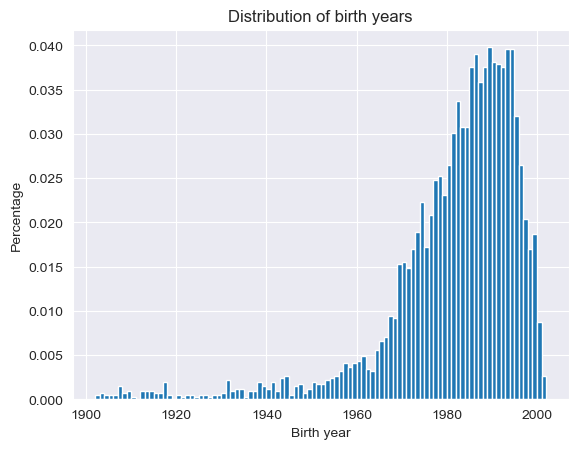

In [5]:
## Task 1.4
plt.hist(df_japan_ath['birthyear'],100, density=True)
plt.title("Distribution of birth years")
plt.xlabel("Birth year")
plt.ylabel("Percentage")
plt.grid(drawstyle="steps")
plt.show()

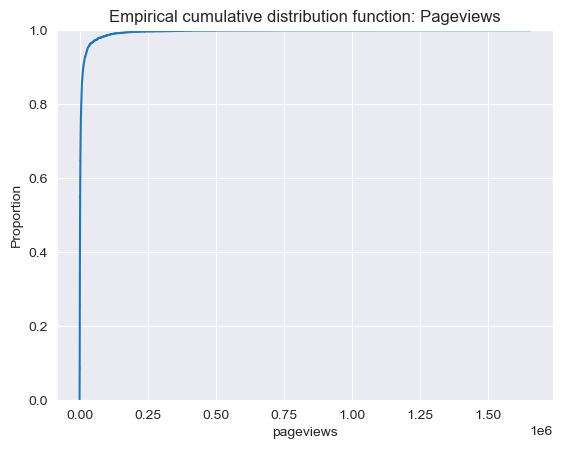

In [6]:
## Task 1.5
# plot a CDF using seaborn built-in function
fig, axs = plt.subplots(1, 1)
sns.ecdfplot(df_japan_ath['pageviews'])
axs.set_title("Empirical cumulative distribution function: Pageviews")
plt.show()

**1.6** Discuss: why is it hard to visualize the distribution in the above ECDF plot?

Since there is a small amount of japanese athletes who have very high pageviews up to 1,000,000 while most of the atheletes' pageviews are from 100 to 20,000, so the pageviews follow the heavy-tail distribution. At the beginning, a large number of data leads to the sharp increase of proportion while the increase of pageview (x axis) is relatively small. At the end, there are a few data points occupied a small part of the proportion which have a large number of pageviews leading to the high increase in x-axis, pageviews. Therefore, it is hard to visualize the distribution in the above ECDF plot.

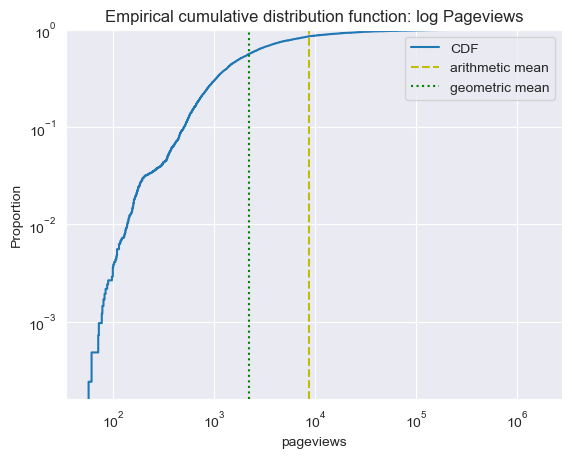

In [7]:
## Task 1.7

fig, axs = plt.subplots(1, 1)
sns.ecdfplot(df_japan_ath['pageviews'])
plt.yscale('log')
plt.xscale('log')
plt.axvline(df_japan_ath['pageviews'].mean(), color='y', linestyle='dashed')
plt.axvline(stats.gmean(df_japan_ath['pageviews']), color='g', linestyle='dotted')
plt.legend(['CDF', 'arithmetic mean', 'geometric mean'])
axs.set_title("Empirical cumulative distribution function: log Pageviews")
plt.show()

**1.8** **Discuss:** Visually, does it look like the distribution is a power law?

Yes.

In [8]:
def simple_bootstrap(f, val):
    bs = np.random.choice(val, size=(len(val), 10000), replace=True)
    val_ = f(bs)
    lower, upper = np.quantile(val_, q=[0.025, 0.975])
    return f(val_), lower, upper

In [9]:
## Task 1.9

est, lowci, hici = simple_bootstrap(f=lambda x: np.mean(x, axis=0), 
                                    val=df_japan_ath['pageviews'])
print("arithmetic mean: μ = {} 95%CI [{}, {}]".format(est, lowci, hici))

est, lowci, hici = simple_bootstrap(f=lambda x: stats.gmean(x, axis=0), 
                                    val=df_japan_ath['pageviews'])
print("geometric mean: μ = {} 95%CI [{}, {}]".format(est, lowci, hici))

arithmetic mean: μ = 8680.81608573854 95%CI [7544.395761581372, 10049.514443366481]
geometric mean: μ = 2185.0637170623036 95%CI [2096.4833993475313, 2278.785561952589]


**1.10** **Discuss:** What advantages does the geometric mean have over the arithmetic mean to summarize the distribution?

The geometric mean shows the exponential of the arithmetic mean of logarithms. In the distribution above, the numbers in both pageviews and athletes change exponentially, so it's visually better in log-scale x and y axes. Therefore, the geometric mean is better to describe the distribution than arithmetic mean. In addition to that, the geometric mean is more stable in this case, which means it's less influenced by the outliers.

## Task 2 — 20 pts

Next, investigate the question posed by Mr. Ogane. *Why do so many Tokyo FC players have birthdays in the same month?* 
Here you will not look specifically at Tokyo FC players, but more generally at the birthdays of the athletes in the dataset you have explored in Task 1

**2.1** Calculate and plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months, i.e., what percentage of births happen in January, February, etc.

**2.2** Puzzled with the results, you use census data to retrieve the percentage of births happening each month (this is given to you in an array below). Plot this distribution.

**2.3** **Discuss:** what is different between the distributions you ploted in **2.1** and **2.2**

After discussing with your colleagues at work, a theory comes to your mind: school in Japan starts in April. Children who were born between April 1 and March 31 of the following year are placed within the same grade. Therefore, you suspect that the observed pattern may have something to do with when students start school.

**2.4** Considering that students in Japanese schools have the same birth distribution over the months of the year as the overall Japanese population, i.e., the `birth_per_month` array that was provided to you, calculate:

- For students born in April, how many months older are they than the average student in their grade?
- For students born in March, how many months younger are they than the average student in their grade?

**2.5** **Discuss:** Considering your common sense and the results obtained from the simulation: what advantage do students born in April have over those born in March? How may this affect their odds of becoming professional athletes?

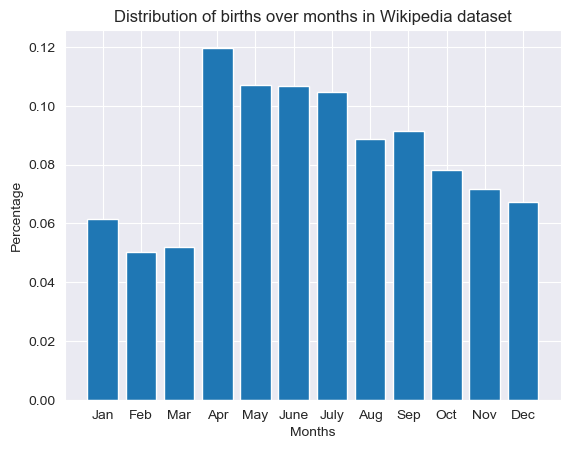

In [10]:
## Task 2.1 
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
          'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

birthmonth = df_japan_ath['birthdate'].str.split('-', expand=True)[1]
month_per = (birthmonth.value_counts()/df_japan_ath.shape[0]).sort_index()
plt.bar(MONTHS, month_per)
plt.xlabel('Months')
plt.ylabel('Percentage')
plt.grid(drawstyle="steps")
plt.title("Distribution of births over months in Wikipedia dataset")
plt.show()

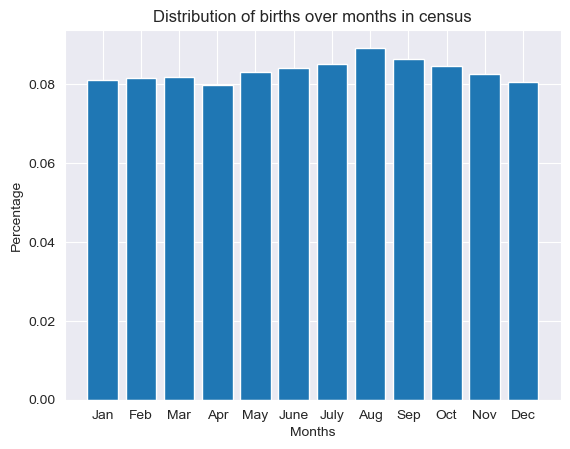

In [11]:
## Task 2.2

# census data provided
birth_per_month = pd.Series([
0.08118368,0.08148065, 0.08182577, 0.07982728, 0.08301363,
0.08422556, 0.08518067, 0.08925791, 0.08635247, 0.08460279,
0.08258825, 0.08046134
])

# plot the distribution of census data to retrieve the percentage of births happening each month
plt.bar(MONTHS, birth_per_month)
plt.title("Distribution of births over months in census")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.grid(drawstyle="steps")
plt.show()

**2.3** **Discuss:** what is different between the distributions you ploted in **2.1** and **2.2**</br><br>

In 2.1, we plot the distribution of births (among the athletes contained in the Wikipedia dataset) over months. April achieves the maximum frequency among all the months with frequency 0.1198. From April to March in next year, the births generally decrease. The decrease is obvious and in March, the births frequency is only 0.0519, less than half of the frequency in April.</br>
In 2.2, we plot the distribution of census data to retrieve the percentage of births happening each month. We can find the births in each months are close to each other and relatively steady. April is the min while August is the max, but the changes between months are not significant and follow a steady pattern.</br>
The difference is: Among the athletes contained in the Wikipedia dataset, the births decrease from April to March in next year. The maximum value 0.1198 occurs in April and the decreasing pattern is obvious. However, such pattern is not shown in census data. The births are quite steady among all the months and all of there frequency is close to 0.08.

In [12]:
## Task 2.4

# For students born in April
# define the months older they are compared with the average student in their grade
apr_older = np.roll(np.arange(0, 12), 3)
apr_older_avg = sum(apr_older * birth_per_month)

# For students born in March
# define the months younger they are compared with the average student in their grade
mar_ynger = np.roll(np.arange(0,12)[::-1], 3)
mar_ynger_avg = sum(mar_ynger * birth_per_month)

print("For students born in April, they are {} months older than the average student in their grade".format(apr_older_avg))
print("For students born in March, they are {} months younger than the average student in their grade".format(mar_ynger_avg))

For students born in April, they are 5.47076905 months older than the average student in their grade
For students born in March, they are 5.52923095 months younger than the average student in their grade


**2.5** **Discuss:** Considering your common sense and the results obtained from the simulation: what advantage do students born in April have over those born in March? How may this affect their odds of becoming professional athletes?</br><br>

For students born in April, they are 5.47 months older than the average student in their grade. Students are still growing and sometimes grows very fast. Older students are normally in better shape and have better physical fitness. When competing with others in the same grade, students born in April have advantage in natural -- they have better physical fitness(stronger, faster, jump higher etc.). Also they may have other kinds of advantage because they are older. For instance, they may have better neural recruitment ability of muscle, or they have better judgement and understanding of specific sports. In contrast, students born in March are 5.52923095 months younger than the average student in their grade and 11 months younger than the students born in April. Therefore, they have the disadvantage in natural that they are competing with someone older than them and they have worse physical fitness. Comparing with students born in April, students born in March are almost 1 year younger. When competing with students born in April, students born in March are almost competing with students in a higher grade. </br>
This effect makes students born in April have a better chance becoming prefessional athletes maybe because if students have better performance among students in the same grade, they would have better chance be selected to a higher level of sports team. For example, from U15 to U17, or from U17 to a professional contract. Also there might be another reason. If students have better performance among students in the same grade, they may become more confident and competitive, which help them become prefessional athletes.

## Task 3 — 20 pts

You report your findings to Mr. Ogane, who receives them with great interest. He asks you: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* (Here, “Wikipedia-famous” refers to those individuals notable enough to have made it into English Wikipedia.)

**3.1** Create a new column in the dataframe called `date_diff` representing the distance between the athlete's birthdate and the cutoff date of his school class. 
- For individuals born in April, May, June, July, August, and September: The distance should be positive and represent the number of days between the birthdate and the previous April 1. For example, if someone is born on April 1, the distance is 0, if someone is born on April 10, the distance is 9, etc.
- For individuals born in October, November, December, January, February, and March: The distance should be negative and represent the number of days between the following April 1 and the birthdate. For example, if someone is born on March 31, the distance is -1; if someone is born on March 27, the distance is -5.
- Print the `date_diff` for the athletes with ids:  `20639249` and `58982155`.

**3.2** Create three numpy arrays `x`, `y`, and `ind` all of size 360. 
- `x` should contain the integers between -180 and 179 (-180 and 179 inclusive). 
- `y` should contain the percentage of athletes born with a `date_diff` equal to the corresponding value of `x`.
- `ind` should contain 0 if `x` is smaller than zero and 1 if `x` is bigger or equal to zero.


**3.3** Estimate the following linear regression: `y ~ x + ind` using `statsmodels`. Report the summary of the model.

**3.4** **Discuss:** What does the coefficient associated with the dummy variable `ind` captures in the above regression?

**3.5** Use the model parameters to estimate the percentage of athletes born on March 31st, i.e., use the intercept ($\beta_0$) and the coefficient associated with `x` ($\beta_1$) and calculate: $\beta_0 - 1 * \beta_1$ (recall that $x$ equals -1 in March 31st).

**3.6** Use the model parameters to estimate the percentage of athletes born on April 1st.

**3.7** **Discuss:** Drawing from your knowledge of observational studies and the questions answered thus far, respond to Mr. Ogane's question: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* Explain whether the evidence you have obtained is convincing and why.

---

**Comment**: Note that in **3.2**, the size of the array created is slightly smaller than the number of days in the year. This is for simplicity's sake.

In [88]:
## Task 3.1

# Create date_diff column representing the distance between the athlete and the cutoff date.
df_japan_ath['cutoff_date'] = None
df_japan_ath['birthdate'] = pd.to_datetime(df_japan_ath['birthdate'])
df_japan_ath['birthmonth'] = df_japan_ath['birthdate'].dt.month
for index, row in df_japan_ath.iterrows():
    if row['birthmonth'] >= 10 and row['birthmonth'] <= 12:
        cutoff_data_str = str(int(row['birthyear'])+1) + "-4-1"
    else:
        cutoff_data_str = str(int(row['birthyear'])) + "-4-1"
    df_japan_ath.loc[index, 'cutoff_date'] = pd.to_datetime(cutoff_data_str).date()

df_japan_ath['cutoff_date'] = pd.to_datetime(df_japan_ath['cutoff_date'])
df_japan_ath['date_diff'] = (df_japan_ath['birthdate'] - df_japan_ath['cutoff_date']).dt.days
df_japan_ath = df_japan_ath.drop(['cutoff_date'], axis=1)


dtdf1 = (df_japan_ath[df_japan_ath['id'] == 20639249]['date_diff']).values
dtdf2 = (df_japan_ath[df_japan_ath['id'] == 58982155]['date_diff']).values
print("Id 20639249: date_diff = {} days;\n\
Id 58982155: date_diff = {} days." .format("%.0f"% dtdf1, "%.0f"% dtdf2))

Id 20639249: date_diff = -24 days;
Id 58982155: date_diff = 6 days.


In [89]:
## Task 3.2

df_temp = df_japan_ath[df_japan_ath['date_diff'] >= -180]
df_temp = df_temp[df_temp['date_diff'] <= 179]
date_diff_count = df_temp['date_diff'].value_counts().sort_index()

x = np.arange(-180, 180, 1)
y = np.array(date_diff_count / len(df_japan_ath))
ind = (x >= 0).astype(int)

In [90]:
## Task 3.3

df_OSL = pd.DataFrame()
df_OSL['y'] = y
df_OSL['x'] = x
df_OSL['ind'] = ind

reg_exp = 'y ~ x + ind'
model1 = smf.ols(formula=reg_exp, data=df_OSL)
results1 = model1.fit()
print_model1 = results1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     119.0
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.47e-40
Time:                        20:38:27   Log-Likelihood:                 2019.2
No. Observations:                 360   AIC:                            -4032.
Df Residuals:                     357   BIC:                            -4021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0015      0.000     14.686      0.0

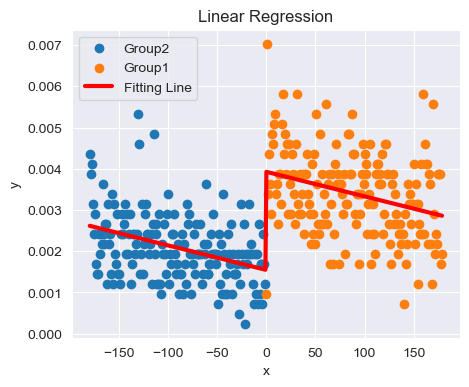

In [110]:
y_fitted = results1.fittedvalues
fig, ax = plt.subplots(figsize=(5, 4))
x1 = x[x < 0]
y1 = y[x < 0]
x2 = x[x >= 0]
y2 = y[x >= 0]
ax.scatter(x1, y1, label="Group2")
ax.scatter(x2, y2, label="Group1")
ax.plot(x, y_fitted, 'red', linewidth=3, label="Fitting Line")
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**3.4** **Discuss:** What does the coefficient associated with the dummy variable `ind` captures in the above regression? <br>
The coefficient of variable "ind" is about 0.0024. In its numerical terms, it captures the difference of athletes born percentages on 3.31(with x=-1) and 4.1(with x=0). It serves as a correcting term because of our special assignment rule for variable "x". In detail, the difference between the value of y (percentage of athletes born) for x=-180 and x=+179 should be tiny, because they are only a few days away. However, without the correcting term "ind", our linear regression model with introduce a huge gap between these two values. Furthermore, although it seems that there is only one day difference between 3.31 and 4.1, however, they are 1 year apart as we discussed above. The percentage of athletes born needs to be large then. Therefore, we introduce a dummy variable "ind" as the correction to our linear regression model. Its value is the difference between the percentage of x=-1 and x=0.

In [17]:
## Task 3.5 
# in March 31st, x = -1, ind = 0
beta_0 = 0.0015
beta_1 = -5.947e-06
ind_coef = 0.0024
y_mar31 = beta_1 * (-1) + ind_coef * 0 + beta_0
print('The estimated percentage of athletes born on March 31st is: {}'.format(y_mar31))

The estimated percentage of athletes born on March 31st is: 0.001505947


In [18]:
## Task 3.6
# in April 1st, x = 0, ind = 1
y_apr1 = beta_1 * 0 + ind_coef * 1 + beta_0
print('The estimated percentage of athletes born on April 1st is: {}'.format(y_apr1))

The estimated percentage of athletes born on April 1st is: 0.0039


**3.7** **Discuss:** Drawing from your knowledge of observational studies and the questions answered thus far, respond to Mr. Ogane's question: *is there a causal effect between being older than your peers and becoming a Wikipedia-famous athlete?* Explain whether the evidence you have obtained is convincing and why. <br>
It is not convincing. From our result of the linear regression model, it seems that there is a kind of positive relationship between being older and becoming a famous athlete. In other words, the older you are than your peers, the more likely you are to succeed. However, there might exist another factor A which will influence the relative age and the probability of becoming a famous athlete at the same time, which will also lead to similar linear regression results as T3.3. As a consequence, we cannot say that there is a causal effect between them. And we need to use the matching pair method to justify the causal effect between being older and becoming famous athletes. With the "matching" concept, we are not getting rid of the influence of the unobserved covariates, but we could make the differences of other unobserved factors tiny among all x values we take.

## Task 4 — 20 pts

You return to Mr. Ogane with your findings, which he again receives with great interest. The sharp manager, however, asks a question that ignites your curiosity: *are athletes that are born right after the school cut-off date (i.e., in April or May) simply better?**

To understand if that is the case, you come up with a plan: the number of pageviews received by a Wikipedia page is a good way to differentiate between mildly famous athletes and truly famous ones. Thus you can do a matched analysis comparing athletes born in February or March (right before the cut-off) with athletes born in April or May (right after the cut-off); you should discard all athletes that were not born in one of these four months.

To make matched athletes even more comparable, you will also only consider pairs of athletes that:
1. were born in the same year; 
2. have the same gender; and
3. have the same occupation.

Matching should be done 1-to-1; i.e., each athlete born in February/March should be matched to one and only one athlete born in April/May (there will naturally be some athletes left unmatched).

**4.1** Obtain the matched data described in the text above. Report the number of matched pairs and the number of discarded athletes. Your resulting dataframe should contain one row per athlete and an indicator variable `is_after`, which equals 1 when the athlete was born in April or May and 0 otherwise. Note that here you are doing exact matching, and not propensity score matching!

**4.2** The number of pageviews is heavy-tailed, as we have seen in Task 1. Create a new column in your matched dataframe containing the natural logarithm of the number of pageviews.

**4.3** Assuming that whether the athlete is born in the two months right before the cutoff (February and March) or the two months right after (April and May) is assigned at random, use a linear regression to estimate the effect of being born after rather than before the cutoff date in the number of pageviews athletes receive. Use the log-transformed value you calculated in **4.2** as the outcome of your model (i.e., the $y$ of the regression). Report the summary of your model.


**4.4** **Discuss:** Interpret the coefficients obtained from the linear regression.

**4.5** Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:
- Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:
    1. "Skill": an individual's innate talent towards a sport.
    2. "Relative Age": how old an individual was in comparison to his or her peers.
    3. "Success before adulthood": how successful the individual is as an athlete as a child/teenager.
    4. "Success as an adult": how successful the individual is as an athlete as an adult.
- **Discuss:** Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram.

---


In [19]:
## Task 4.1

# Matching athletes with same gender, birthyear and occupation, yet is_after attribute is different
# Method 1: Iterate in one group.
df_jp_ath_t4 = df_japan_ath.copy(deep=True)
df_feb2may = df_jp_ath_t4[df_jp_ath_t4.birthmonth.isin([2, 3, 4, 5])]
df_feb2may['is_after'] = (df_jp_ath_t4['birthmonth']>=4).astype(int)

df_feb2mar = df_feb2may[df_feb2may.birthmonth.isin([2, 3])]
df_apr2may = df_feb2may[df_feb2may.birthmonth.isin([4, 5])]

df_jp_pair = pd.DataFrame()

for index_1, rows_1 in df_feb2mar.iterrows():
    df_temp_select = df_apr2may.loc[(df_apr2may['birthyear'] == rows_1['birthyear']) & (df_apr2may['gender'] == rows_1['gender']) & (df_apr2may['occupation'] == rows_1['occupation'])]
    if len(df_temp_select) != 0:
        df_select = df_temp_select.sample(n=1, axis=0)
        df_jp_pair = pd.concat([df_jp_pair, pd.DataFrame.from_records([rows_1])])
        df_jp_pair = pd.concat([df_jp_pair, df_select])
        df_feb2mar = df_feb2mar.drop(index=index_1)
        df_apr2may = df_apr2may.drop(index=df_select.index)

df_jp_pair.reset_index()
print("There are {0} matching pairs and {1} athelets are discarded, where {2} athelets are born during Feb to May."
      .format(int(len(df_jp_pair)/2), len(df_jp_ath_t4)-len(df_jp_pair), len(df_feb2may)-len(df_jp_pair)))

There are 358 matching pairs and 3407 athelets are discarded, where 642 athelets are born during Feb to May.


In [36]:
## Task4.1
# Method 2: Bipartite graph maximum matching
df_feb2mar = df_feb2may[df_feb2may.birthmonth.isin([2, 3])]
df_feb2mar = df_feb2mar.reset_index(drop = True)
df_apr2may = df_feb2may[df_feb2may.birthmonth.isin([4, 5])]
df_apr2may = df_apr2may.reset_index(drop = True)

a_b_graph = np.ones((df_feb2mar.shape[0],df_apr2may.shape[0]))*99
for indexa, rowa in df_feb2mar.iterrows():
    for indexb, rowb in df_apr2may.iterrows():
        if((rowa['birthyear']==rowb['birthyear'])
           &(rowa['gender']==rowb['gender'])
           &(rowa['occupation']==rowb['occupation'])):
            a_b_graph[indexa,indexb] = 1

row_ind, col_ind = optimize.linear_sum_assignment(a_b_graph)

total = df_feb2mar.shape[0] + df_apr2may.shape[0]
matched_num = col_ind[a_b_graph[row_ind, col_ind]<2].shape[0]*2 # equal to: row_ind[a_b_graph[row_ind, col_ind]<2]
print("There are {0} matching pairs and {1} athelets are discarded, where {2} athelets are born during Feb to May."
      .format(int((matched_num)/2), len(df_jp_ath_t4)-matched_num, total-matched_num))

There are 358 matching pairs and 3407 athelets are discarded, where 642 athelets are born during Feb to May.


In [21]:
## Task 4.2
df_jp_pair['pageviews_log'] = df_jp_pair['pageviews'].apply(lambda x: np.log(x))
df_jp_pair.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,birthmonth,date_diff,is_after,pageviews_log
0,20641239,Yasuo Takamori,SOCCER PLAYER,M,False,Japan,1934-03-03,1934.0,1047.0,3,-29,0,6.953684
53,20639439,Masao Uchino,SOCCER PLAYER,M,False,Japan,1934-04-21,1934.0,902.0,4,20,1,6.804615
0,733681,Kazuyoshi Miura,SOCCER PLAYER,M,True,Japan,1967-02-26,1967.0,496424.0,2,-34,0,13.115186
434,18747057,Shinkichi Kikuchi,SOCCER PLAYER,M,True,Japan,1967-04-12,1967.0,7968.0,4,11,1,8.983189
0,19134567,Masahiro Hamazaki,SOCCER PLAYER,M,False,Japan,1940-03-14,1940.0,983.0,3,-18,0,6.890609


In [22]:
## Task 4.3
mod = smf.ols(formula='pageviews_log ~  is_after', data=df_jp_pair)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          pageviews_log   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     13.90
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           0.000208
Time:                        19:52:00   Log-Likelihood:                -1210.1
No. Observations:                 716   AIC:                             2424.
Df Residuals:                     714   BIC:                             2433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8307      0.069    112.817      0.0

**4.4** **Discuss:** Interpret the coefficients obtained from the linear regression.
<br>The coefficient of intercept is 7.8307. It represents the average number of page view for those athletes who are born in February and March. <br>
The coefficient of variable "is_after" is -0.3659. It represents the difference in the average number of page view between athletes who are born in April, May and in February, March. It shows that the average number of page view for athletes who are born in April and May are less than for those born in February and March.

**4.5** Interpreting the results obtained throughout this homework, create a short text (max. 250 words) where you:
- Present and explain a credible causal diagram capturing the relationship between the variables below, and justify your causal diagram given the questions answered in this homework:
    1. "Skill": an individual's innate talent towards a sport.
    2. "Relative Age": how old an individual was in comparison to his or her peers.
    3. "Success before adulthood": how successful the individual is as an athlete as a child/teenager.
    4. "Success as an adult": how successful the individual is as an athlete as an adult.
- **Discuss:** Consider two equally successful children athletes, one born on March 31 and the other on April 1 — which will likely be more successful as an adult? Your answer should be consistent with your causal diagram. <br>

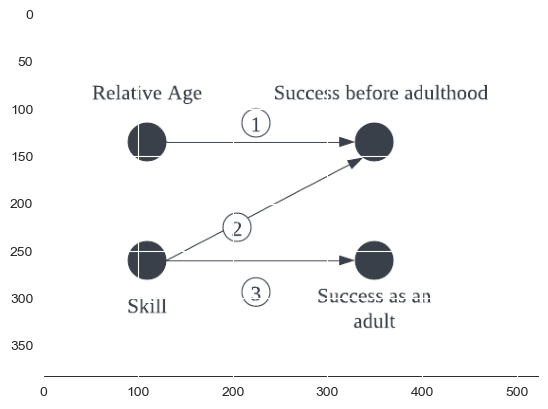

In [129]:
from PIL import Image
img = Image.open("./causal_diagram.png")
plt.imshow(img)

Line1: From Task2, we speculate that students who are older than peers have better physical conditions and are more likely to continue professional athlete careers because of their success in adolescence. Therefore, we could use the percentage of athletes' birth to evaluate the **Success before adulthood**. From Task3, we get the conclusion that the relative age will influence the distribution of athletes' born percentage in each month. Therefore, we draw the causal effect line1. <br>
Line3: From Task4, it seems that **relative age** will have a negative influence on the success of athletes. However, after stepping into adulthood, the difference in physical conditions between older athletes and peers is tiny. The factor, which leads to the negative pageview difference between group1(is_after=1) and group2(is_after=0), is **Skill** diversity between the two groups. The negative influence of **relative age** occurs because the athlete with younger **relative age** has a better talent compared with those who are relatively older. Therefore, we draw the causal effect line3. <br>
Line2: Athletes who are younger than their peers will have poor physical condition in their student’s periods. To stick to their professional careers, these athletes must have a higher talent which makes them possible to step into higher student professional leagues and continue to compete with others who have better physical fitness. Therefore, we draw the causal effect line2. <br>

Discussion: the child athlete born on March 31 will be more successful because his **Skill** is higher than the other one. His talent has compensated for his disadvantages in physical condition in his student period.

## Task 5 — 20 pts

Your findings in Task 4 provide important information for Tokyo FC to scout for young athletes. However, Mr. Ogane points out that other countries have messier cut-off dates for school (e.g., in the U.S., it varies widely by state), and thus the results may be less applicable to other countries.

While you could investigate specific cut-off dates per country, you decide to first use your machine learning skills to get a sense of how promising your efforts might turn out to be. This is made easy as you find an extended version of the dataset you've been working on so far, which contains data about all Wikipedia biographies all around the world

**5.1**Load the dataset containing data about Wikipedia-famous individuals into memory using pandas. You should load the data directly from the compressed file. Then, print the first few lines of the dataset.


**5.2** Create two columns in this dataframe:
- `is_athlete` an indicator variable which equals 1 if the occupation of an individual is related to a sport (you are provided with a list below) and 0 otherwise.
- `dayofyear` an integer between 1 and 366 indicating on which day of the year the individual was born.

**5.3** For each country:
- Create a training set with 80% of the individuals and a test set with the remaining 20%;
- Train a random forest model (using `sklearn`, you can use the default parameters) to predict whether an individual is an athlete or not based on: 1) the day of the year they were born `dayofyear`; 2) the year they were born (e.g., 1964, year should be a numerical variable) and 3) their gender.
- report the precision of your classifier for each country.

**5.4** Estimate the percentage of `athlete` individuals per country (simply by counting in the data).

**5.5** **Discuss:** how can the results from **5.4** impact the metric (precision) used in **5.3**? What could be a better suited metric to use here?

**5.6** Repeat the procedure done in **5.3**, but now calculate the metric you proposed in **5.5**.

**5.7** **Discuss:** according to this analysis, in which other countries might you be able to use the date of birth to recruit good athletes? Justify.

In [69]:
## Task 5.1
PATH = './data/'
file_name = os.path.join(PATH, 'all_entities.csv.gz')
df_all = pd.read_csv(file_name, compression = 'gzip')
df_all.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0


In [70]:
## Task 5.2
athlete_categories = {
    'ATHLETE',
    'BASKETBALL PLAYER',
    'BOXER',
    'CYCLIST',
    'GYMNAST',
    'HANDBALL PLAYER',
    'HOCKEY PLAYER',
    'SKATER',
    'SKIER',
    'TENNIS PLAYER',
    'SOCCER PLAYER',
    'SWIMMER',
    'WRESTLER'
}
df_all['is_athlete'] = df_all['occupation'].isin(athlete_categories).astype(int)
df_all['dayofyear'] = pd.to_datetime(df_all['birthdate']).dt.dayofyear
df_all.head()

,id,name,occupation,gender,alive,bplace_country,birthdate,birthyear,pageviews,is_athlete,dayofyear
0,4848272,Donald Trump,POLITICIAN,M,True,United States,1946-06-14,1946.0,10221172.0,0,165
1,13623554,Che Guevara,SOCIAL ACTIVIST,M,False,Argentina,1928-06-14,1928.0,3660108.0,0,166
2,1687680,Pope Francis,RELIGIOUS FIGURE,M,True,Argentina,1936-12-17,1936.0,3893767.0,0,352
3,21492751,Nelson Mandela,SOCIAL ACTIVIST,M,False,South Africa,1918-07-18,1918.0,4359499.0,0,199
4,63747,Muhammad Ali,BOXER,M,False,United States,1942-01-17,1942.0,3940228.0,1,17


In [82]:
## Task 5.3
countries = list(df_all['bplace_country'].unique())
features = ['dayofyear', 'birthyear', 'gender']
label = 'is_athlete'
precisions = []
for country in countries:
    df_cur_country = df_all[df_all['bplace_country'] == country]
    X = pd.get_dummies(df_cur_country[features])
    y = df_cur_country[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    precisions.append(precision)
    print('The precision of {} is : {}'.format(country, precision))

The precision of United States is : 0.3190789473684211
The precision of Argentina is : 0.8
The precision of South Africa is : 0.9
The precision of Spain is : 0.7866108786610879
The precision of Mexico is : 0.5517241379310345
The precision of United Kingdom is : 0.5175438596491229
The precision of Poland is : 0.7894736842105263
The precision of Russia is : 0.6863905325443787
The precision of Brazil is : 0.8761904761904762
The precision of France is : 0.8
The precision of Germany is : 0.7402597402597403
The precision of Romania is : 0.7894736842105263
The precision of India is : 0.0
The precision of Italy is : 0.6927710843373494
The precision of Ukraine is : 0.7254901960784313
The precision of Japan is : 0.8940628637951106
The precision of China is : 0.7804878048780488
The precision of Belgium is : 0.7352941176470589
The precision of Czechia is : 0.8125
The precision of Austria is : 0.76
The precision of Sweden is : 0.6111111111111112
The precision of Iran is : 0.7777777777777778
The pre

In [83]:
## Task 5.4
percentages = []
for country in countries:
    df_cur_country = df_all[df_all['bplace_country'] == country]
    percent = len(df_cur_country.loc[df_cur_country['is_athlete']==1]) / len(df_cur_country)
    percentages.append(percent)
    print('The percentage of athlete in {} is {}'.format(country, percent))

The percentage of athlete in United States is 0.1603082851637765
The percentage of athlete in Argentina is 0.728380024360536
The percentage of athlete in South Africa is 0.45041322314049587
The percentage of athlete in Spain is 0.6517498565691336
The percentage of athlete in Mexico is 0.41597796143250687
The percentage of athlete in United Kingdom is 0.31179394487121553
The percentage of athlete in Poland is 0.4474097331240188
The percentage of athlete in Russia is 0.48035714285714287
The percentage of athlete in Brazil is 0.8311258278145696
The percentage of athlete in France is 0.45802161263507896
The percentage of athlete in Germany is 0.49793046357615894
The percentage of athlete in Romania is 0.5683646112600537
The percentage of athlete in India is 0.05535924617196702
The percentage of athlete in Italy is 0.4714527981910684
The percentage of athlete in Ukraine is 0.43493761140819964
The percentage of athlete in Japan is 0.8490527182866557
The percentage of athlete in China is 0.38

**5.5** **Discuss:** how can the results from **5.4** impact the metric (precision) used in **5.3**? What could be a better suited metric to use here? <br>

The result from T5.4 shows that the dataset is imbalanced(skewed) for our RandomForest Model. In details, the ratio of the athletes number and the total population varies from country to country. Therefore, it will make the baseline of our model varies from country to country. As a consequence, it is possible for a model in one country, to have a great "Precision" value because it captures the skewed distribution instead of learning features. And the "Recall" value will be relatively small because "Precision" and "Recall" are inversely proportional to each other . This kind of model will have a poor performance in other real dataset when the distribution changes. In this situation, we could not draw to the conclusion that this model is better than other models.
<br>
In order to deal with the skewed distribution problem, we could use F1 score which will balance the Precision and Recall values and handle the imbalanced data problem.

In [130]:
## Task 5.6
features = ['dayofyear', 'birthyear', 'gender']
label = 'is_athlete'
f1scores = []
for country in countries:
    df_cur_country = df_all[df_all['bplace_country'] == country]
    X = pd.get_dummies(df_cur_country[features])
    y = df_cur_country[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    f1score = metrics.f1_score(y_test, y_pred)
    f1scores.append(f1score)
    print('The f1 score of {} is : {}'.format(country, f1score))

The f1 score of United States is : 0.22346368715083798
The f1 score of Argentina is : 0.7739130434782608
The f1 score of South Africa is : 0.7727272727272727
The f1 score of Spain is : 0.8008849557522124
The f1 score of Mexico is : 0.6229508196721311
The f1 score of United Kingdom is : 0.5182341650671785
The f1 score of Poland is : 0.7241379310344828
The f1 score of Russia is : 0.6932515337423312
The f1 score of Brazil is : 0.8907014681892332
The f1 score of France is : 0.7405660377358491
The f1 score of Germany is : 0.6794871794871794
The f1 score of Romania is : 0.7209302325581395
The f1 score of India is : 0.0
The f1 score of Italy is : 0.7147147147147147
The f1 score of Ukraine is : 0.6736842105263158
The f1 score of Japan is : 0.8980322003577818
The f1 score of China is : 0.712871287128713
The f1 score of Belgium is : 0.6814814814814814
The f1 score of Czechia is : 0.7906976744186047
The f1 score of Austria is : 0.7586206896551725
The f1 score of Sweden is : 0.6519337016574586
The

In [132]:
F1_score_array = np.array(f1scores)
max_indexs = np.argsort(F1_score_array)[-5:]
for index in max_indexs:
    print("{}: {}".format(countries[index], F1_score_array[index]))

Portugal: 0.8421052631578947
Uruguay: 0.8604651162790697
Greece: 0.870967741935484
Brazil: 0.8907014681892332
Japan: 0.8980322003577818


**5.7** **Discuss:** according to this analysis, in which other countries might you be able to use the date of birth to recruit good athletes? Justify. <br>

Considering the result in T5.6 and the influence of sample size to the model reliability, except from Japan, the models of Brazil, Greece and Uruguay have a better performance when predicting good athletes according to the date of birth.